In [ ]:
!gdown 1cIYg8XBSK-yIwMayCIVsz4FeUCKfZHlJ

Downloading...
From: https://drive.google.com/uc?id=1cIYg8XBSK-yIwMayCIVsz4FeUCKfZHlJ
To: /content/EmoticonHuggingFace.csv.zip
100% 29.3M/29.3M [00:00<00:00, 39.6MB/s]


In [ ]:
!unzip EmoticonHuggingFace.csv.zip

Archive:  EmoticonHuggingFace.csv.zip
  inflating: EmoticonHuggingFace.csv  


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('EmoticonHuggingFace.csv')

In [ ]:
df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,0,Text,LemmatizeText,HuggingFaceEmoticon
0,0,0,0,0,0,#tfiglobal geopolitics aug #macron legitimise...,geopolitics aug legitimises controlover ⁉️fran...,geopolitics aug legitimises controlover ⁉️fran...,amusement
1,1,1,1,1,1,🇺🇦🇷🇺⚡the armed forces of ukraine attacked the ...,🇺🇦🇷🇺⚡the armed forces of ukraine attacked the ...,🇺🇦🇷🇺⚡the armed force of ukraine attacked the n...,neutral
2,2,2,2,2,2,@kminorschneider @miriam @scottuhltx 😥 🇺🇦 help...,😥 🇺🇦 help stop putin at president zelensky s 🌍...,😥 🇺🇦 help stop putin at president zelensky s 🌍...,approval
3,3,3,3,3,3,darya dugina daughter of “putin’s brain” alexa...,darya dugina daughter of “putin’s brain” alexa...,darya dugina daughter of “putin’s brain” alexa...,neutral
4,4,4,4,4,4,@huxijin_gt i knew u don't know the proper wor...,gt i knew you don t know the proper word for s...,gt i knew you don t know the proper word for s...,neutral
...,...,...,...,...,...,...,...,...,...
247486,247486,672114,672114,672114,190910,time to stop the war 🙏 #timepoy #ukraine @time...,time to stop the war 🙏 zelenska tv ukraine,time to stop the war 🙏 zelenska tv ukraine,neutral
247487,247487,672115,672115,672115,190911,beautiful goosebumps man maaaaaximum aquarius ...,beautiful goosebumps man maaaaaximum aquarius ...,beautiful goosebump man maaaaaximum aquarius ♒...,admiration
247488,247488,672120,672120,672120,190916,need company to finish your morning porridge b...,need company to finish your morning porridge b...,need company to finish your morning porridge b...,desire
247489,247489,672121,672121,672121,190917,please do something if you can for us we are h...,please do something if you can for us we are h...,please do something if you can for u we are ho...,desire


In [ ]:
columns_to_remove = ['Unnamed: 0.4',	'Unnamed: 0.3',	'Unnamed: 0.2',	'Unnamed: 0.1',	'Unnamed: 0'	,'0',	'Text']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

In [ ]:
df

,LemmatizeText,HuggingFaceEmoticon
0,geopolitics aug legitimises controlover ⁉️fran...,amusement
1,🇺🇦🇷🇺⚡the armed force of ukraine attacked the n...,neutral
2,😥 🇺🇦 help stop putin at president zelensky s 🌍...,approval
3,darya dugina daughter of “putin’s brain” alexa...,neutral
4,gt i knew you don t know the proper word for s...,neutral
...,...,...
247486,time to stop the war 🙏 zelenska tv ukraine,neutral
247487,beautiful goosebump man maaaaaximum aquarius ♒...,admiration
247488,need company to finish your morning porridge b...,desire
247489,please do something if you can for u we are ho...,desire


In [ ]:
df.to_csv('EmoticonUkraineRussia.csv')

In [ ]:
unique_count = df['HuggingFaceEmoticon'].nunique()
print("Number of unique values:", unique_count)

Number of unique values: 27


In [ ]:
category_counts = df['HuggingFaceEmoticon'].value_counts()

In [ ]:
category_counts

neutral           146773
approval           11722
caring             11400
gratitude          10551
admiration         10225
sadness             9399
love                7758
optimism            6418
curiosity           4272
amusement           3818
disapproval         3291
annoyance           3243
disappointment      3016
anger               2467
joy                 2145
fear                2131
desire              2123
excitement          1357
surprise            1338
confusion           1194
disgust              804
remorse              669
realization          623
embarrassment        518
nervousness          135
pride                 98
relief                 3
Name: HuggingFaceEmoticon, dtype: int64

In [ ]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


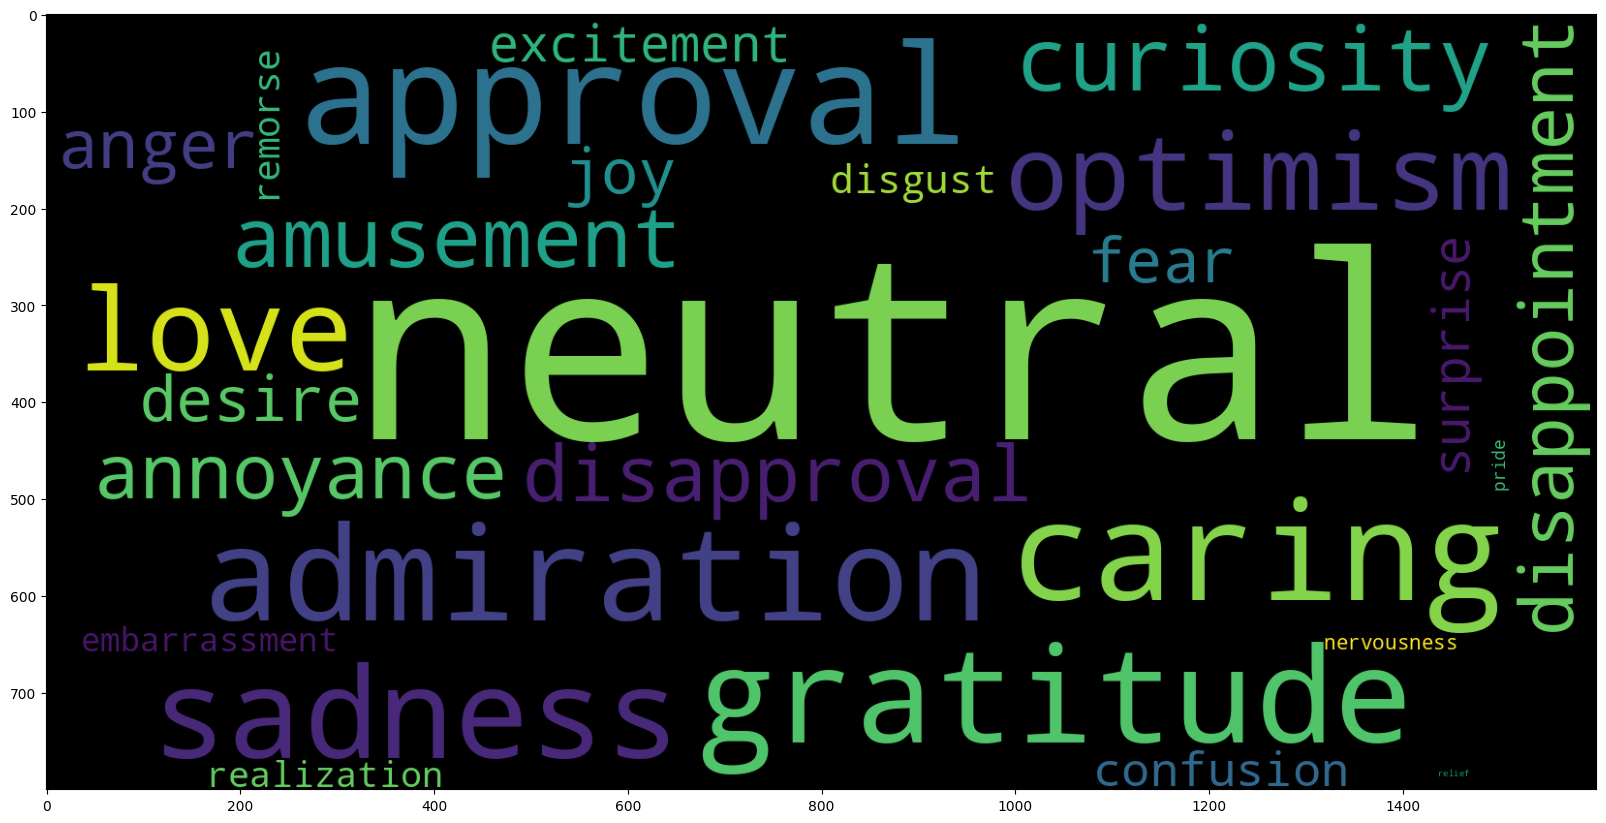

In [ ]:
data_neg = df['HuggingFaceEmoticon'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X=df.LemmatizeText
y=df.HuggingFaceEmoticon

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =0)

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
# vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
# X_train = vectorizer.transform(X_train)
# X_test  = vectorizer.transform(X_test)

In [ ]:
# # vectoriser = TfidfVectorizer(ngram_range=(5,5), max_features=500000)
# vectoriser = TfidfVectorizer(stop_words='english')
# # vectoriser.fit(X_train)
# # print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(stop_words='english',max_features=4000)

In [ ]:
X_train = vectoriser.fit_transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
X_train

<173243x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 1610803 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

<74248x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 691882 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
BNBmodel = MultinomialNB(alpha=0.0)
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
mcc = matthews_corrcoef(y_test, y_pred1)

# Print the MCC value
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 0.3471604274828076


In [ ]:
from sklearn.metrics import fowlkes_mallows_score

In [ ]:
fmi = fowlkes_mallows_score(y_test, y_pred1)

In [ ]:
print(f"Fowlkes-Mallows Index: {fmi}")

Fowlkes-Mallows Index: 0.6496082751184008


In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
kappa = cohen_kappa_score(y_test, y_pred1)

# Print the Cohen's Kappa value
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.30024224926499643


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred1)

In [ ]:
cv_accuracy = cross_val_score(BNBmodel, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric error

In [ ]:
print("Cross-Validation Accuracy Scores:")
print(cv_accuracy)

Cross-Validation Accuracy Scores:
[0.64229848 0.6431643  0.6438281  0.63879589 0.64246133]


In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.utils import to_categorical

# Assuming you have your text data and corresponding labels in X_train_text, X_test_text, y_train, and y_test

# Separating the 95% data for training data and 5% for testing data
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

# Tokenize and pad your text data
max_sequence_length = 100  # adjust based on your data
vocab_size = 10000  # adjust based on your data

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encoding
num_classes = len(np.unique(y_train_encoded))
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=num_classes)

# Model 1: Bidirectional LSTM
input_lstm = Input(shape=(max_sequence_length,))
embedding_lstm = Embedding(input_dim=vocab_size, output_dim=100)(input_lstm)
lstm_out = Bidirectional(LSTM(64))(embedding_lstm)

# Model 2: Convolutional Neural Network (CNN)
input_cnn = Input(shape=(max_sequence_length,))
embedding_cnn = Embedding(input_dim=vocab_size, output_dim=100)(input_cnn)
conv1d_out = Conv1D(64, 3, activation='relu')(embedding_cnn)
pooling_out = MaxPooling1D(pool_size=4)(conv1d_out)
flatten_cnn = Flatten()(pooling_out)

# Merge models
merged = concatenate([lstm_out, flatten_cnn])

# Common Dense layers
dense1 = Dense(64, activation='relu')(merged)
output = Dense(num_classes, activation='softmax')(dense1)

# Create the ensemble model
ensemble_model = Model(inputs=[input_lstm, input_cnn], outputs=output)

# Compile the model
ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ensemble_model.fit([X_train_padded, X_train_padded], y_train_one_hot, epochs=2, batch_size=100, validation_data=([X_test_padded, X_test_padded], y_test_one_hot))


Epoch 1/2
2352/2352 [==============================] - 891s 377ms/step - loss: 1.1597 - accuracy: 0.7004 - val_loss: 0.9209 - val_accuracy: 0.7456
Epoch 2/2
2352/2352 [==============================] - 871s 370ms/step - loss: 0.7925 - accuracy: 0.7723 - val_loss: 0.8251 - val_accuracy: 0.7665


In [ ]:
ensemble_model.fit([X_train_padded, X_train_padded], y_train_one_hot, epochs=2, batch_size=32, validation_data=([X_test_padded, X_test_padded], y_test_one_hot))

Epoch 1/2
7348/7348 [==============================] - 621s 84ms/step - loss: 0.6956 - accuracy: 0.7931 - val_loss: 0.8300 - val_accuracy: 0.7706
Epoch 2/2
7348/7348 [==============================] - 613s 83ms/step - loss: 0.5388 - accuracy: 0.8351 - val_loss: 0.8911 - val_accuracy: 0.7577


In [ ]:
ensemble_model.save('Emoji')

In [ ]:
!zip -r /content/Emoji.zip /content/Emoji

  adding: content/Emoji/ (stored 0%)
  adding: content/Emoji/fingerprint.pb (stored 0%)
  adding: content/Emoji/keras_metadata.pb (deflated 91%)
  adding: content/Emoji/saved_model.pb (deflated 91%)
  adding: content/Emoji/variables/ (stored 0%)
  adding: content/Emoji/variables/variables.index (deflated 65%)
  adding: content/Emoji/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/Emoji/assets/ (stored 0%)


In [ ]:
import joblib
import pickle

In [ ]:
ensemble_model = pickle.load(open('LSTMCNN.pkl','rb'))

In [ ]:
model.save('ensemble_model')

NameError: ignored

In [ ]:
joblib.dump(ensemble_model,'LSTMCNN.pkl')

['LSTMCNN.pkl']

In [ ]:
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, concatenate, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.utils import to_categorical

In [ ]:
# New text for prediction
new_text = ["i am sad 🥲","i am happy 😊"]

# Tokenize and pad the new text
tokenizer = Tokenizer(num_words=1000)
max_sequence_length = 100
new_text_seq = tokenizer.texts_to_sequences(new_text)
new_text_padded = pad_sequences(new_text_seq, maxlen=max_sequence_length)
label_encoder = LabelEncoder()
# Make predictions using the trained ensemble model
predictions = ensemble_model.predict([new_text_padded, new_text_padded])

# Decode the predictions to get the corresponding labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Display the predicted labels
print("Predicted Emoji Sentiment:", predicted_labels[0])


1/1 [==============================] - 0s 76ms/step


NotFittedError: ignored

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_emoji_sentiment(new_text):
    # Load pre-trained model
    ensemble_model = pickle.load(open('LSTMCNN.pkl','rb'))  # Update the file path accordingly

    # Tokenize and pad the input text
    max_sequence_length = 100  # adjust based on your data
    vocab_size = 1000  # adjust based on your data
    tokenizer = Tokenizer(num_words=vocab_size)
    label_encoder = LabelEncoder()

      # Tokenize and pad the new text
    new_text_seq = tokenizer.texts_to_sequences(new_text)
    new_text_padded = pad_sequences(new_text_seq, maxlen=max_sequence_length)

    # Make predictions using the trained ensemble model
    predictions = ensemble_model.predict([new_text_padded, new_text_padded])

    # Decode the predictions to get the corresponding labels
    predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
    return predicted_labels

# Example usage:
# Assuming you have a DataFrame df with a 'text' column
df = pd.DataFrame({'text': ["i am happy 😊", "😊😊😊"]})
predicted_labels = predict_emoji_sentiment(df['text'])
print("Predicted Emoji Sentiments:", predicted_labels)


1/1 [==============================] - 1s 1s/step


NotFittedError: ignored

In [ ]:
# Make predictions on the test set
y_pred_one_hot = ensemble_model.predict([X_test_padded, X_test_padded])

# Convert predictions back to class labels
y_pred_labels = np.argmax(y_pred_one_hot, axis=1)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Decode labels if you used label encoding
y_pred_labels = label_encoder.inverse_transform(y_pred_labels)
y_test_labels = label_encoder.inverse_transform(y_test_labels)

# Generate and print the classification report
print(classification_report(y_test_labels, y_pred_labels))

387/387 [==============================] - 8s 20ms/step
                precision    recall  f1-score   support

    admiration       0.74      0.62      0.68       518
     amusement       0.71      0.53      0.60       173
         anger       0.66      0.41      0.51       109
     annoyance       0.36      0.26      0.30       172
      approval       0.39      0.36      0.38       601
        caring       0.64      0.63      0.63       553
     confusion       0.48      0.28      0.36        53
     curiosity       0.45      0.52      0.48       202
        desire       0.44      0.50      0.47       111
disappointment       0.28      0.24      0.26       154
   disapproval       0.44      0.29      0.35       162
       disgust       0.80      0.54      0.65        37
 embarrassment       0.71      0.38      0.50        26
    excitement       0.45      0.35      0.39        83
          fear       0.57      0.55      0.56       103
     gratitude       0.92      0.86      0.89  

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

**Simple Naive Bayes Model**

Hyperparameter Tuning(Perform a grid search to find the best hyperparameters for your model. This can include alpha values for Laplace smoothing in the Naive Bayes model.)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialize the grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model for predictions
best_clf = grid_search.best_estimator_
predictions = best_clf.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'alpha': 0.1}


Trying different Value of aplha for hyperparamtere Tuning and Found that alpha=0.1 has the best parameter

In [ ]:
# Example of trying different alpha values
alphas = [0.1, 0.5, 1.0, 1.5, 2.0]
for alpha in alphas:
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Alpha: {alpha}, Accuracy: {accuracy:.2f}")

Alpha: 0.1, Accuracy: 0.68
Alpha: 0.5, Accuracy: 0.67
Alpha: 1.0, Accuracy: 0.67
Alpha: 1.5, Accuracy: 0.67
Alpha: 2.0, Accuracy: 0.66


In [ ]:
BNBmodel = MultinomialNB(alpha=0.1)
BNBmodel.fit(X_train, y_train)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
y_pred1

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U14')

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' contains the true target values
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.6763953237797651


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'y_test' contains the true target values and 'y_pred1' contains the predicted values
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred1)
print("Classification Report:\n", class_report)

Accuracy: 0.6763953237797651


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                 precision    recall  f1-score   support

    admiration       0.66      0.31      0.42      3074
     amusement       0.81      0.25      0.38      1115
         anger       0.64      0.10      0.18       755
     annoyance       0.47      0.06      0.11       971
      approval       0.46      0.06      0.11      3495
        caring       0.52      0.43      0.47      3337
     confusion       1.00      0.05      0.09       333
     curiosity       0.14      0.00      0.00      1279
        desire       0.48      0.04      0.07       647
disappointment       0.62      0.01      0.02       946
   disapproval       0.33      0.01      0.01       949
       disgust       1.00      0.10      0.19       220
 embarrassment       0.75      0.04      0.07       160
    excitement       0.65      0.14      0.24       422
          fear       0.74      0.07      0.13       653
     gratitude       0.80      0.60      0.68      3087
           joy       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SVCmodel = LinearSVC()
from sklearn.svm import SVC
# SVCmodel = LinearSVC(C=1.0, max_iter=100, dual=False, random_state=42, class_weight='balanced')
# SVCmodel = SVC(kernel='linear', n_jobs=-1)
SVCmodel=SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
SVCmodel.fit(X_train, y_train)

y_pred2 = SVCmodel.predict(X_test)

In [ ]:
y_pred2

array(['desire', 'neutral', 'neutral', ..., 'disappointment', 'caring',
       'approval'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'y_test' contains the true target values and 'y_pred1' contains the predicted values
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred2)
print("Classification Report:\n", class_report)

Accuracy: 0.6224006033832561


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                 precision    recall  f1-score   support

    admiration       0.57      0.64      0.60      3074
     amusement       0.46      0.57      0.51      1115
         anger       0.27      0.58      0.37       755
     annoyance       0.22      0.38      0.28       971
      approval       0.34      0.24      0.28      3495
        caring       0.52      0.61      0.56      3337
     confusion       0.10      0.39      0.16       333
     curiosity       0.13      0.19      0.16      1279
        desire       0.20      0.51      0.29       647
disappointment       0.15      0.29      0.20       946
   disapproval       0.12      0.24      0.16       949
       disgust       0.21      0.59      0.31       220
 embarrassment       0.20      0.44      0.28       160
    excitement       0.18      0.48      0.26       422
          fear       0.34      0.64      0.44       653
     gratitude       0.92      0.92      0.92      3087
           joy       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' contains the true target values
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.7762363969399849


In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)

y_pred3 = LRmodel.predict(X_test)

In [ ]:
y_pred3

array(['neutral', 'neutral', 'neutral', ..., 'optimism', 'caring',
       'neutral'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'y_test' contains the true target values
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.7638858959163883


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'y_test' contains the true target values and 'y_pred1' contains the predicted values
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred3)
print("Classification Report:\n", class_report)

Accuracy: 0.7638858959163883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                 precision    recall  f1-score   support

    admiration       0.73      0.61      0.67      3074
     amusement       0.88      0.41      0.56      1115
         anger       0.66      0.36      0.47       755
     annoyance       0.50      0.19      0.27       971
      approval       0.47      0.25      0.33      3495
        caring       0.69      0.65      0.67      3337
     confusion       0.72      0.22      0.33       333
     curiosity       0.57      0.38      0.46      1279
        desire       0.60      0.33      0.43       647
disappointment       0.55      0.10      0.17       946
   disapproval       0.48      0.17      0.25       949
       disgust       0.93      0.29      0.44       220
 embarrassment       0.76      0.17      0.28       160
    excitement       0.68      0.26      0.38       422
          fear       0.71      0.28      0.40       653
     gratitude       0.96      0.91      0.93      3087
           joy       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import xgboost as xgb

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

# Assuming 'Category_Column' is the column you want to convert
df['Category_Column_LabelEncoded'] = label_encoder.fit_transform(df['HuggingFaceEmoticon'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset into a pandas DataFrame (replace 'data.csv' with your actual file)
# data = pd.read_csv('data.csv')

# # Create a label encoder instance
# label_encoder = LabelEncoder()

# # Assuming 'Category_Column' is the column you want to convert
# df['Category_Column_LabelEncoded'] = label_encoder.fit_transform(df['HuggingFaceEmoticon'])

# Create a DataFrame for mappings
mapping_df = pd.DataFrame({
    'Category': df['HuggingFaceEmoticon'].unique(),
    'Encoded_Value': label_encoder.transform(df['HuggingFaceEmoticon'].unique())
})

# Save the mapping DataFrame to a CSV file
mapping_df.to_csv('label_mapping.csv', index=False)

print(mapping_df)


          Category  Encoded_Value
0        amusement              1
1          neutral             19
2         approval              4
3          sadness             25
4         optimism             20
5           caring              5
6             love             17
7    embarrassment             12
8       excitement             13
9       admiration              0
10           anger              2
11       curiosity              7
12  disappointment              9
13          desire              8
14             joy             16
15     disapproval             10
16       annoyance              3
17        surprise             26
18       gratitude             15
19            fear             14
20       confusion              6
21     realization             22
22         disgust             11
23         remorse             24
24     nervousness             18
25           pride             21
26          relief             23


In [ ]:
df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,0,Text,LemmatizeText,HuggingFaceEmoticon,Category_Column_LabelEncoded
0,0,0,0,0,0,#tfiglobal geopolitics aug #macron legitimise...,geopolitics aug legitimises controlover ⁉️fran...,geopolitics aug legitimises controlover ⁉️fran...,amusement,1
1,1,1,1,1,1,🇺🇦🇷🇺⚡the armed forces of ukraine attacked the ...,🇺🇦🇷🇺⚡the armed forces of ukraine attacked the ...,🇺🇦🇷🇺⚡the armed force of ukraine attacked the n...,neutral,19
2,2,2,2,2,2,@kminorschneider @miriam @scottuhltx 😥 🇺🇦 help...,😥 🇺🇦 help stop putin at president zelensky s 🌍...,😥 🇺🇦 help stop putin at president zelensky s 🌍...,approval,4
3,3,3,3,3,3,darya dugina daughter of “putin’s brain” alexa...,darya dugina daughter of “putin’s brain” alexa...,darya dugina daughter of “putin’s brain” alexa...,neutral,19
4,4,4,4,4,4,@huxijin_gt i knew u don't know the proper wor...,gt i knew you don t know the proper word for s...,gt i knew you don t know the proper word for s...,neutral,19
...,...,...,...,...,...,...,...,...,...,...
247486,247486,672114,672114,672114,190910,time to stop the war 🙏 #timepoy #ukraine @time...,time to stop the war 🙏 zelenska tv ukraine,time to stop the war 🙏 zelenska tv ukraine,neutral,19
247487,247487,672115,672115,672115,190911,beautiful goosebumps man maaaaaximum aquarius ...,beautiful goosebumps man maaaaaximum aquarius ...,beautiful goosebump man maaaaaximum aquarius ♒...,admiration,0
247488,247488,672120,672120,672120,190916,need company to finish your morning porridge b...,need company to finish your morning porridge b...,need company to finish your morning porridge b...,desire,8
247489,247489,672121,672121,672121,190917,please do something if you can for us we are h...,please do something if you can for us we are h...,please do something if you can for u we are ho...,desire,8


In [ ]:
X=df.LemmatizeText
y=df.Category_Column_LabelEncoded

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =0)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred4 = my_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'y_test' contains the true target values and 'y_pred1' contains the predicted values
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred4)
print("Classification Report:\n", class_report)

Accuracy: 0.7587409761879108
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.60      0.64      3074
           1       0.82      0.52      0.63      1115
           2       0.61      0.40      0.48       755
           3       0.51      0.19      0.28       971
           4       0.48      0.15      0.23      3495
           5       0.70      0.60      0.64      3337
           6       0.66      0.38      0.49       333
           7       0.56      0.40      0.47      1279
           8       0.58      0.40      0.47       647
           9       0.52      0.10      0.17       946
          10       0.42      0.16      0.23       949
          11       0.70      0.49      0.58       220
          12       0.71      0.51      0.59       160
          13       0.64      0.37      0.47       422
          14       0.64      0.47      0.54       653
          15       0.93      0.93      0.93      3087
          16       0.62     

CNN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:


# Split the data into training and testing sets
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df["LemmatizeText"], df["Category_Column_LabelEncoded"], test_size=0.2, random_state=42)

# Tokenize the sentences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)

# Convert the sentences to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Pad the sequences to have the same length
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating="post", padding="post")
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating="post", padding="post")

# Define the CNN model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    keras.layers.Conv1D(32, 5, activation="relu"),
    keras.layers.MaxPooling1D(5),
    keras.layers.Conv1D(64, 5, activation="relu"),
    keras.layers.GlobalMaxPooling1D(),
    # keras.layers.Dense(64, activation='softmax'),
    keras.layers.Dense(27, activation='softmax')
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

# Train the model
history=model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print("Test accuracy:", test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 conv1d_6 (Conv1D)           (None, 96, 32)            2592      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 19, 32)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 15, 64)            10304     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 27)               

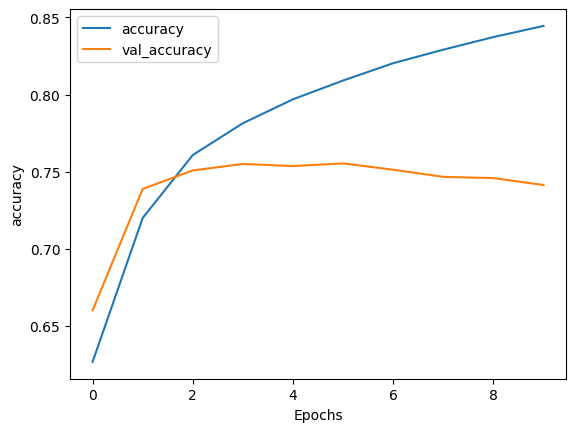

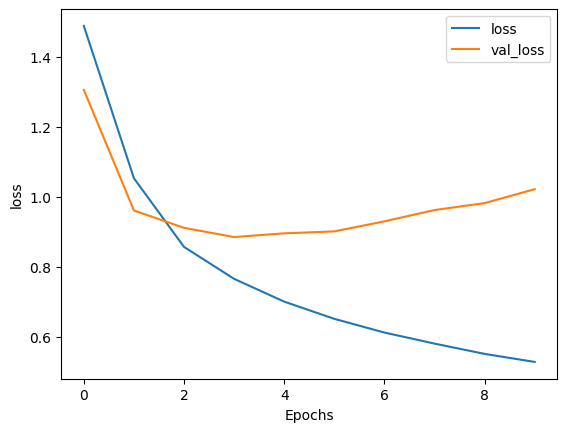

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
y_pred_probs = model.predict(test_padded)
y_pred_classes = y_pred_probs.argmax(axis=-1)

# Compute the evaluation metrics
from sklearn.metrics import classification_report
report = classification_report(test_labels, y_pred_classes)
print(report)

1547/1547 [==============================] - 5s 3ms/step
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      2126
           1       0.75      0.53      0.62       788
           2       0.48      0.41      0.44       494
           3       0.33      0.31      0.32       628
           4       0.36      0.29      0.32      2329
           5       0.63      0.60      0.61      2282
           6       0.46      0.29      0.36       225
           7       0.41      0.37      0.39       819
           8       0.48      0.38      0.42       439
           9       0.30      0.18      0.22       604
          10       0.35      0.23      0.28       673
          11       0.78      0.41      0.54       179
          12       0.68      0.56      0.61       105
          13       0.47      0.25      0.33       265
          14       0.63      0.46      0.53       448
          15       0.93      0.84      0.88      2120
          16       0.63 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LSTM

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['LemmatizeText'], df['Category_Column_LabelEncoded'], stratify = df['Category_Column_LabelEncoded'])


In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional


In [ ]:
from keras.models import Sequential

In [ ]:
!pip install keras-metrics

In [ ]:
import tensorflow as tf
import keras_metrics as km

In [ ]:
# model initialization
model=Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(27,activation='softmax'))




model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         300000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 27)                5427      
                                                                 
Total params: 466,227
Trainable params: 466,227
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1)




Epoch 1/10
5221/5221 [==============================] - 2269s 433ms/step - loss: 1.1627 - accuracy: 0.7031 - val_loss: 0.9522 - val_accuracy: 0.7439
Epoch 2/10
5221/5221 [==============================] - 2125s 407ms/step - loss: 0.9122 - accuracy: 0.7476 - val_loss: 0.8766 - val_accuracy: 0.7551
Epoch 3/10
5221/5221 [==============================] - 2113s 405ms/step - loss: 0.8454 - accuracy: 0.7602 - val_loss: 0.8456 - val_accuracy: 0.7610
Epoch 4/10
5221/5221 [==============================] - 2148s 411ms/step - loss: 0.8069 - accuracy: 0.7682 - val_loss: 0.8446 - val_accuracy: 0.7612
Epoch 5/10
5221/5221 [==============================] - 2138s 409ms/step - loss: 0.7803 - accuracy: 0.7740 - val_loss: 0.8258 - val_accuracy: 0.7645
Epoch 6/10
5221/5221 [==============================] - 2148s 411ms/step - loss: 0.7627 - accuracy: 0.7784 - val_loss: 0.8256 - val_accuracy: 0.7658
Epoch 7/10
5221/5221 [==============================] - 2134s 409ms/step - loss: 0.7433 - accuracy: 0.7817

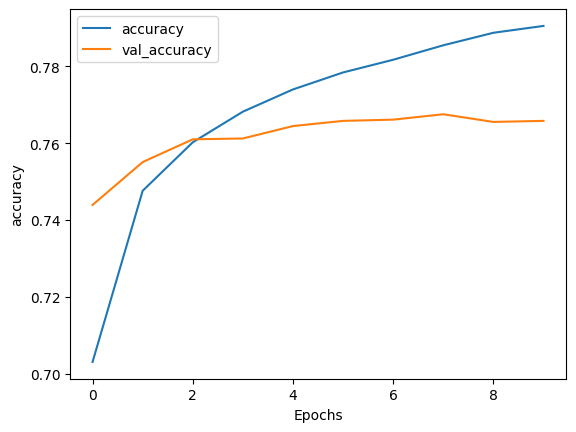

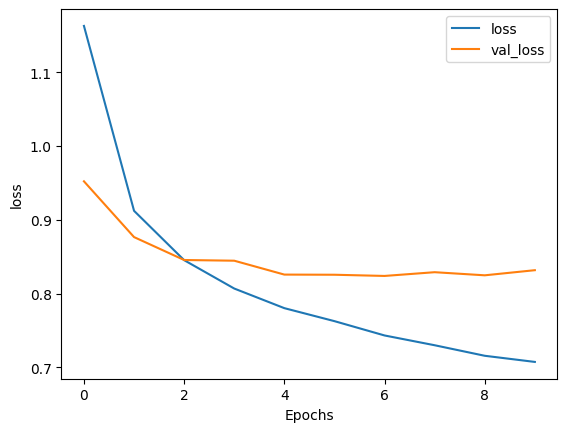

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
y_pred_probs = model.predict(test_padded)
y_pred_classes = y_pred_probs.argmax(axis=-1)

# Compute the evaluation metrics
from sklearn.metrics import classification_report
report = classification_report(test_labels, y_pred_classes)
print(report)

1934/1934 [==============================] - 183s 94ms/step
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      2556
           1       0.71      0.46      0.56       954
           2       0.52      0.44      0.48       617
           3       0.50      0.24      0.32       811
           4       0.47      0.29      0.36      2931
           5       0.66      0.64      0.65      2850
           6       0.62      0.39      0.48       298
           7       0.56      0.47      0.51      1068
           8       0.60      0.49      0.54       531
           9       0.40      0.16      0.22       754
          10       0.45      0.25      0.32       823
          11       0.73      0.50      0.59       201
          12       0.51      0.32      0.39       129
          13       0.51      0.37      0.43       339
          14       0.61      0.49      0.54       533
          15       0.91      0.89      0.90      2638
          16       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test data
y_pred = rf_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.36      0.45      3074
           1       0.57      0.14      0.22      1115
           2       0.57      0.19      0.29       755
           3       0.43      0.05      0.09       971
           4       0.36      0.12      0.18      3495
           5       0.61      0.47      0.53      3337
           6       0.68      0.08      0.15       333
           7       0.51      0.13      0.20      1279
           8       0.59      0.14      0.22       647
           9       0.55      0.05      0.09       946
          10       0.43      0.06      0.11       949
          11       0.57      0.11      0.19       220
          12       0.86      0.07      0.14       160
          13       0.65      0.19      0.30       422
          14       0.60      0.05      0.10       653
          15       0.88      0.77      0.82      3087
          16       0.66      0.24      0.35       652
          17       0.64    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6900253205473548
